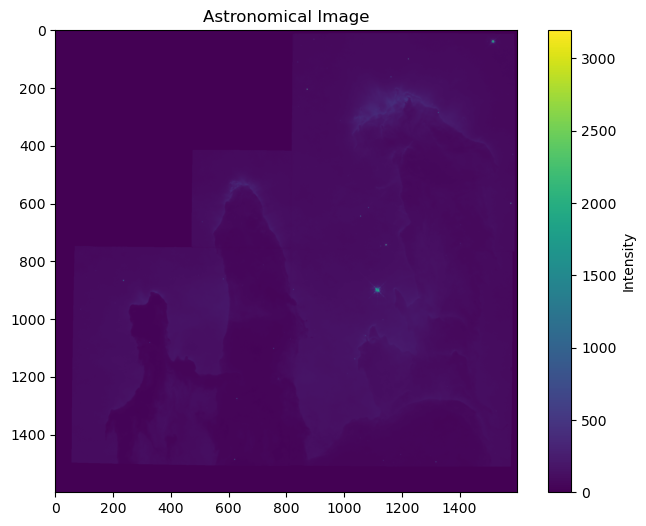

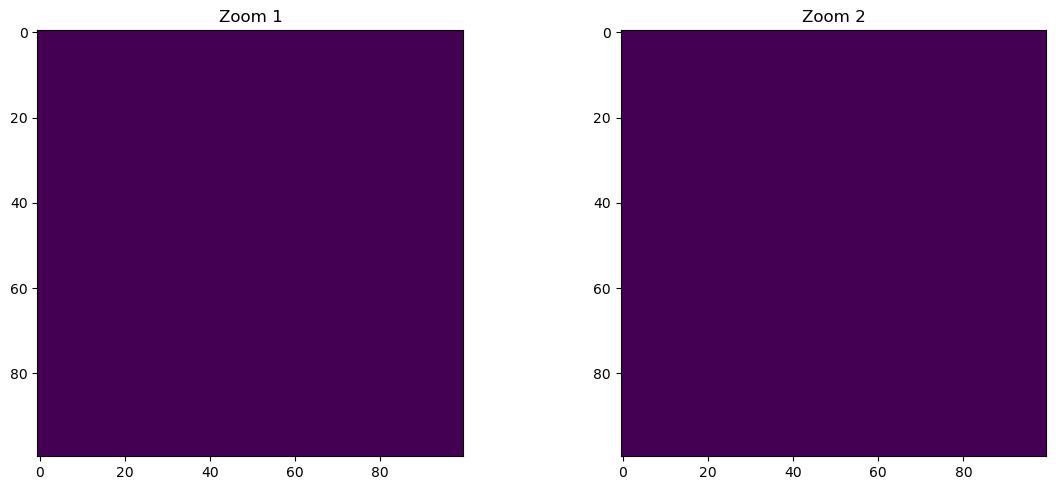

Column names: Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')
Style of entry 27: Pack
Unique brands: 355
     Review #            Brand  \
229      2351   1 To 3 Noodles   
456      2124         7 Select   
463      2117         7 Select   
877      1703  7 Select/Nissin   
911      1669            A-One   

                                               Variety Style   Country Stars  \
229                                     Chatpat Masala  Pack     India     4   
456  Nissin Instant Noodles Tom Yum Seafood Creamy ...  Bowl  Thailand   3.5   
463  Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...  Bowl  Thailand     4   
877                               Super Tom Yum Shrimp   Cup  Thailand   3.5   
911    Mi Ly Instant Noodles Mi Chay Vegetarian Flavor   Cup   Vietnam  1.25   

    Top Ten  
229     NaN  
456     NaN  
463     NaN  
877     NaN  
911     NaN  
USA brands: 49
USA pack-style brands: 27
Top-Ten Brands: ['MAMA' 'Prima Taste

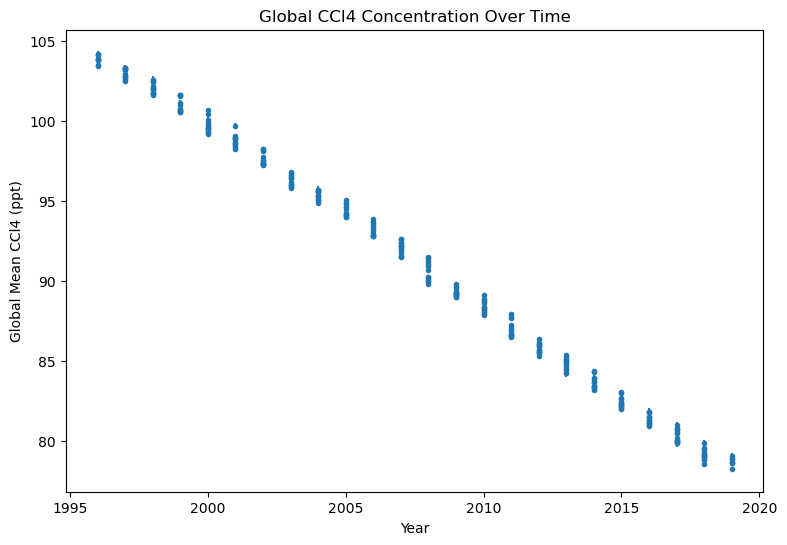

Linear fit parameters:
m = -1.1519719991668242
b = 2403.7900857447125
Reduced chi-square: 13.140071404952499
Example Character: {'name': 'Lina', 'race': 'Elf', 'char_class': 'Wizard', 'age': 120, 'level': 1, 'stats': {'Strength': 6, 'Dexterity': 13, 'Constitution': 12, 'Intelligence': 13, 'Wisdom': 4, 'Charisma': 15}}


In [1]:
# HW 

# 3.1 Plotting an Astronomical Image

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
from scipy.optimize import curve_fit
import random

data = np.loadtxt("astro_image.csv")  

plt.figure(figsize=(8,6))
plt.imshow(data, cmap="viridis")
plt.colorbar(label="Intensity")
plt.title("Astronomical Image")
plt.show()

plt.figure(figsize=(12,5))
zoom1 = data[100:200, 100:200]
zoom2 = data[150:250, 150:250]

plt.subplot(1,2,1)
plt.imshow(zoom1, cmap="viridis")
plt.title("Zoom 1")

plt.subplot(1,2,2)
plt.imshow(zoom2, cmap="viridis")
plt.title("Zoom 2")

plt.tight_layout()
plt.show()

# 3.2 Ramen Dataset

ramen = pd.read_csv("ramen-ratings.csv")  
ramen.head()

# Q1: Column names
print("Column names:", ramen.columns)

# Q2: Style of 27th entry
print("Style of entry 27:", ramen.iloc[26]["Style"])

# Q3: Number of unique brands
print("Unique brands:", ramen["Brand"].nunique())

# Q4: Sorted dataset
ramen_sorted = ramen.sort_values("Brand")
print(ramen_sorted.head())

# Q5: Number of USA brands
print("USA brands:", ramen[ramen["Country"]=="USA"]["Brand"].nunique())

# Q6: USA brands making pack-style ramen
usa_pack = ramen[(ramen["Country"]=="USA") & (ramen["Style"]=="Pack")]
print("USA pack-style brands:", usa_pack["Brand"].nunique())

# Q7: Challenge — brands in top ten
top10_brands = ramen[~ramen["Top Ten"].isna()]["Brand"].unique()
print("Top-Ten Brands:", top10_brands)

# 3.3 Linear Regression 

tbl = Table.read("global_CCl4_MM.dat", format="ascii")
df = tbl.to_pandas()

print("COCl4 data columns:", df.columns)

df = df[['CCl4ottoyr', 'CCl4ottoGLm', 'CCl4ottoGLsd']]
df.columns = ["date", "global_mean_concentration", "global_mean_concentration_sd"]

plt.figure(figsize=(9,6))
plt.errorbar(
    df["date"],
    df["global_mean_concentration"],
    yerr=df["global_mean_concentration_sd"],
    fmt="."
)
plt.xlabel("Year")
plt.ylabel("Global Mean CCl4 (ppt)")
plt.title("Global CCl4 Concentration Over Time")
plt.show()

def line(x, m, b):
    return m*x + b

mask = (~df["global_mean_concentration"].isna()) & (~df["global_mean_concentration_sd"].isna())
x = df.loc[mask, "date"].to_numpy()
y = df.loc[mask, "global_mean_concentration"].to_numpy()
sigma = df.loc[mask, "global_mean_concentration_sd"].to_numpy()

popt, pcov = curve_fit(line, x, y, sigma=sigma)
m, b = popt
print("Linear fit parameters:")
print("m =", m)
print("b =", b)

y_exp = line(x, m, b)
chi2 = np.sum(((y_exp - y)**2) / sigma**2)
red_chi2 = chi2 / (len(x) - 1)
print("Reduced chi-square:", red_chi2)

# 4. Extra Credit 
class PlayingCharacter:
    def __init__(self, name, race, char_class, age):
        self.name = name
        self.race = race
        self.char_class = char_class
        self.age = age
        self.level = 1

    def roll_stats(self):
        rolls = [random.randint(3,18) for _ in range(6)]
        keys = ["Strength", "Dexterity", "Constitution", 
                "Intelligence", "Wisdom", "Charisma"]
        self.stats = dict(zip(keys, rolls))

pc = PlayingCharacter("Lina", "Elf", "Wizard", 120)
pc.roll_stats()
print("Example Character:", pc.__dict__)






